<a href="https://colab.research.google.com/github/yewcheng/Stock-Price-Prediction/blob/main/DAC_Internal_META_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error 

In [47]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
meta = yf.Ticker('META')

In [49]:
history = meta.history(start='2022-10-1', end='2023-2-27')
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-03 00:00:00-04:00,137.139999,139.619995,136.100006,138.610001,27723100,0.0,0.0
2022-10-04 00:00:00-04:00,140.490005,142.389999,139.339996,140.279999,34670700,0.0,0.0
2022-10-05 00:00:00-04:00,138.240005,140.210007,134.779999,138.979996,27979300,0.0,0.0
2022-10-06 00:00:00-04:00,137.720001,141.449997,136.600006,139.070007,36231100,0.0,0.0
2022-10-07 00:00:00-04:00,136.759995,138.289993,132.440002,133.449997,33214800,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,170.220001,173.179993,169.699997,172.880005,24171300,0.0,0.0
2023-02-21 00:00:00-05:00,174.309998,178.169998,171.880005,172.080002,34592600,0.0,0.0
2023-02-22 00:00:00-05:00,171.070007,172.759995,169.690002,171.119995,22433200,0.0,0.0


In [50]:
fb_stockprice = pd.DataFrame(history)
fb_stockprice

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-03 00:00:00-04:00,137.139999,139.619995,136.100006,138.610001,27723100,0.0,0.0
2022-10-04 00:00:00-04:00,140.490005,142.389999,139.339996,140.279999,34670700,0.0,0.0
2022-10-05 00:00:00-04:00,138.240005,140.210007,134.779999,138.979996,27979300,0.0,0.0
2022-10-06 00:00:00-04:00,137.720001,141.449997,136.600006,139.070007,36231100,0.0,0.0
2022-10-07 00:00:00-04:00,136.759995,138.289993,132.440002,133.449997,33214800,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,170.220001,173.179993,169.699997,172.880005,24171300,0.0,0.0
2023-02-21 00:00:00-05:00,174.309998,178.169998,171.880005,172.080002,34592600,0.0,0.0
2023-02-22 00:00:00-05:00,171.070007,172.759995,169.690002,171.119995,22433200,0.0,0.0


In [51]:
df=history
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-03 00:00:00-04:00,137.139999,139.619995,136.100006,138.610001,27723100,0.0,0.0
2022-10-04 00:00:00-04:00,140.490005,142.389999,139.339996,140.279999,34670700,0.0,0.0
2022-10-05 00:00:00-04:00,138.240005,140.210007,134.779999,138.979996,27979300,0.0,0.0
2022-10-06 00:00:00-04:00,137.720001,141.449997,136.600006,139.070007,36231100,0.0,0.0
2022-10-07 00:00:00-04:00,136.759995,138.289993,132.440002,133.449997,33214800,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00-05:00,170.220001,173.179993,169.699997,172.880005,24171300,0.0,0.0
2023-02-21 00:00:00-05:00,174.309998,178.169998,171.880005,172.080002,34592600,0.0,0.0
2023-02-22 00:00:00-05:00,171.070007,172.759995,169.690002,171.119995,22433200,0.0,0.0


In [52]:
df.shape

(100, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

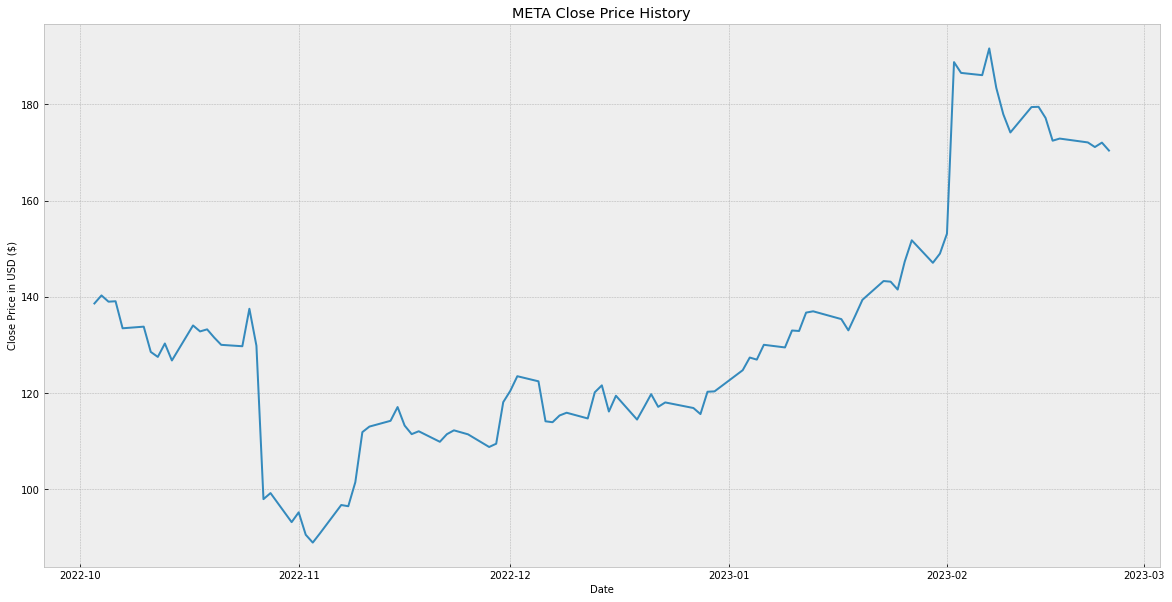

In [53]:
plt.figure(figsize=(20,10))
plt.title('META Close Price History')
plt.plot(fb_stockprice['Close'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price in USD ($)', fontsize=10)
plt.show

In [54]:
df = df[['Close']]
df

,Close
Date,
2022-10-03 00:00:00-04:00,138.610001
2022-10-04 00:00:00-04:00,140.279999
2022-10-05 00:00:00-04:00,138.979996
2022-10-06 00:00:00-04:00,139.070007
2022-10-07 00:00:00-04:00,133.449997
...,...
2023-02-17 00:00:00-05:00,172.880005
2023-02-21 00:00:00-05:00,172.080002
2023-02-22 00:00:00-05:00,171.119995


In [55]:
futuredays= 25

df['Prediction'] = df[['Close']].shift(-futuredays)
df

<ipython-input-55-fb3e41939295>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-futuredays)


,Close,Prediction
Date,,
2022-10-03 00:00:00-04:00,138.610001,96.720001
2022-10-04 00:00:00-04:00,140.279999,96.470001
2022-10-05 00:00:00-04:00,138.979996,101.470001
2022-10-06 00:00:00-04:00,139.070007,111.870003
2022-10-07 00:00:00-04:00,133.449997,113.019997
...,...,...
2023-02-17 00:00:00-05:00,172.880005,NaN
2023-02-21 00:00:00-05:00,172.080002,NaN
2023-02-22 00:00:00-05:00,171.119995,NaN


In [56]:
X = np.array(df.drop(['Prediction'], 1))[:-futuredays]
print(X)

[[138.61000061]
 [140.27999878]
 [138.97999573]
 [139.07000732]
 [133.44999695]
 [133.78999329]
 [128.53999329]
 [127.5       ]
 [130.28999329]
 [126.76000214]
 [134.03999329]
 [132.80000305]
 [133.22999573]
 [131.52999878]
 [130.00999451]
 [129.72000122]
 [137.50999451]
 [129.82000732]
 [ 97.94000244]
 [ 99.19999695]
 [ 93.16000366]
 [ 95.19999695]
 [ 90.54000092]
 [ 88.91000366]
 [ 90.79000092]
 [ 96.72000122]
 [ 96.47000122]
 [101.47000122]
 [111.87000275]
 [113.01999664]
 [114.22000122]
 [117.08000183]
 [113.23000336]
 [111.44999695]
 [112.05000305]
 [109.86000061]
 [111.44000244]
 [112.23999786]
 [111.41000366]
 [108.77999878]
 [109.45999908]
 [118.09999847]
 [120.44000244]
 [123.48999786]
 [122.43000031]
 [114.12000275]
 [113.93000031]
 [115.33000183]
 [115.90000153]
 [114.70999908]
 [120.15000153]
 [121.58999634]
 [116.15000153]
 [119.43000031]
 [114.48000336]
 [117.08999634]
 [119.76000214]
 [117.12000275]
 [118.04000092]
 [116.87999725]
 [115.62000275]
 [120.26000214]
 [120.33

<ipython-input-56-1b9e02a2fd68>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-futuredays]


In [57]:
Y = np.array(df['Prediction'])[:-futuredays]
print(Y)

[ 96.72000122  96.47000122 101.47000122 111.87000275 113.01999664
 114.22000122 117.08000183 113.23000336 111.44999695 112.05000305
 109.86000061 111.44000244 112.23999786 111.41000366 108.77999878
 109.45999908 118.09999847 120.44000244 123.48999786 122.43000031
 114.12000275 113.93000031 115.33000183 115.90000153 114.70999908
 120.15000153 121.58999634 116.15000153 119.43000031 114.48000336
 117.08999634 119.76000214 117.12000275 118.04000092 116.87999725
 115.62000275 120.26000214 120.33999634 124.73999786 127.37000275
 126.94000244 130.02000427 129.47000122 132.99000549 132.88999939
 136.71000671 136.97999573 135.36000061 133.02000427 136.1499939
 139.36999512 143.27000427 143.13999939 141.5        147.30000305
 151.74000549 147.05999756 148.97000122 153.11999512 188.77000427
 186.52999878 186.05999756 191.61999512 183.42999268 177.91999817
 174.1499939  179.42999268 179.47999573 177.16000366 172.44000244
 172.88000488 172.08000183 171.11999512 172.03999329 170.38999939]


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [59]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

In [60]:
x_futuredays = df.drop(['Prediction'], 1)[:-futuredays]
x_futuredays = x_futuredays.tail(futuredays)
x_futuredays = np.array(x_futuredays)
x_futuredays

<ipython-input-60-64869c49f2cd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_futuredays = df.drop(['Prediction'], 1)[:-futuredays]


array([[120.15000153],
       [121.58999634],
       [116.15000153],
       [119.43000031],
       [114.48000336],
       [117.08999634],
       [119.76000214],
       [117.12000275],
       [118.04000092],
       [116.87999725],
       [115.62000275],
       [120.26000214],
       [120.33999634],
       [124.73999786],
       [127.37000275],
       [126.94000244],
       [130.02000427],
       [129.47000122],
       [132.99000549],
       [132.88999939],
       [136.71000671],
       [136.97999573],
       [135.36000061],
       [133.02000427],
       [136.1499939 ]])

In [61]:
tree_prediction = tree.predict(x_futuredays)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_futuredays)
print(lr_prediction)

[139.36999512 143.27000427 133.02000427 141.5        147.30000305
 151.74000549 141.5        148.97000122 153.11999512 188.77000427
 186.52999878 191.61999512 191.61999512 132.99000549 177.91999817
 174.1499939  179.42999268 179.47999573 177.16000366 172.44000244
 172.88000488 172.08000183 171.11999512 172.03999329 170.38999939]

[134.70697302 135.17192385 133.41543829 134.47449637 132.87622313
 133.71894727 134.58104858 133.72863585 134.02568825 133.651142
 133.24431033 134.74249042 134.76831925 136.18900795 137.03819361
 136.89935353 137.89383587 137.71624886 138.8528008  138.82051046
 140.0539285  140.14110355 139.61803356 138.86248692 139.8731095 ]


<ipython-input-62-c7cdf5e3d559>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


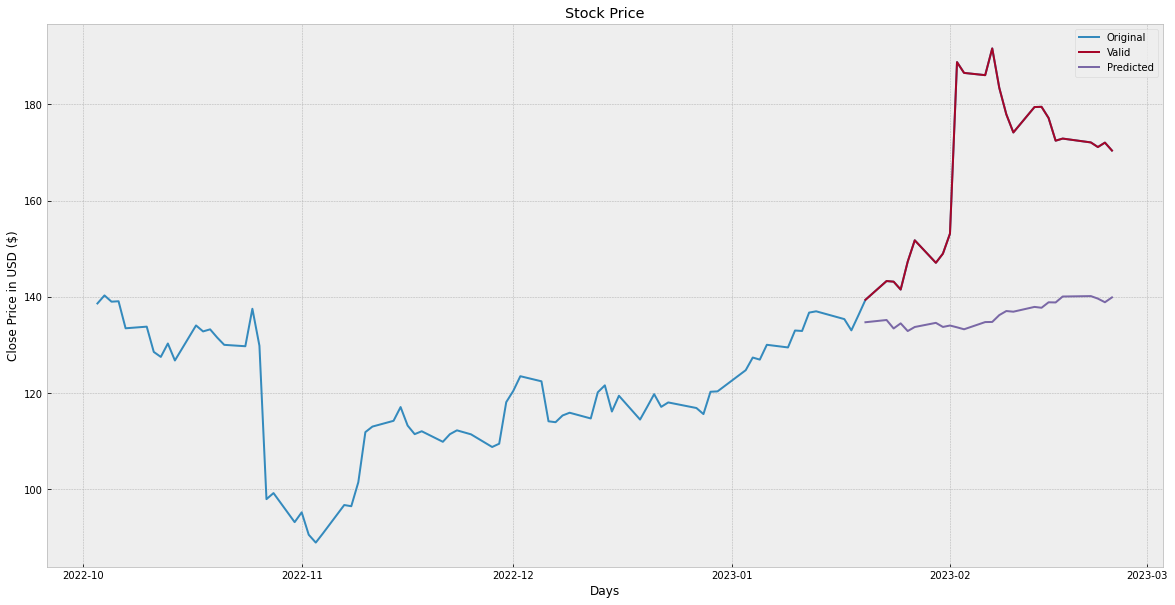

In [62]:
#Linear regression
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close']])
plt.plot(valid[['Predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()

<ipython-input-64-ea8c1277f71b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


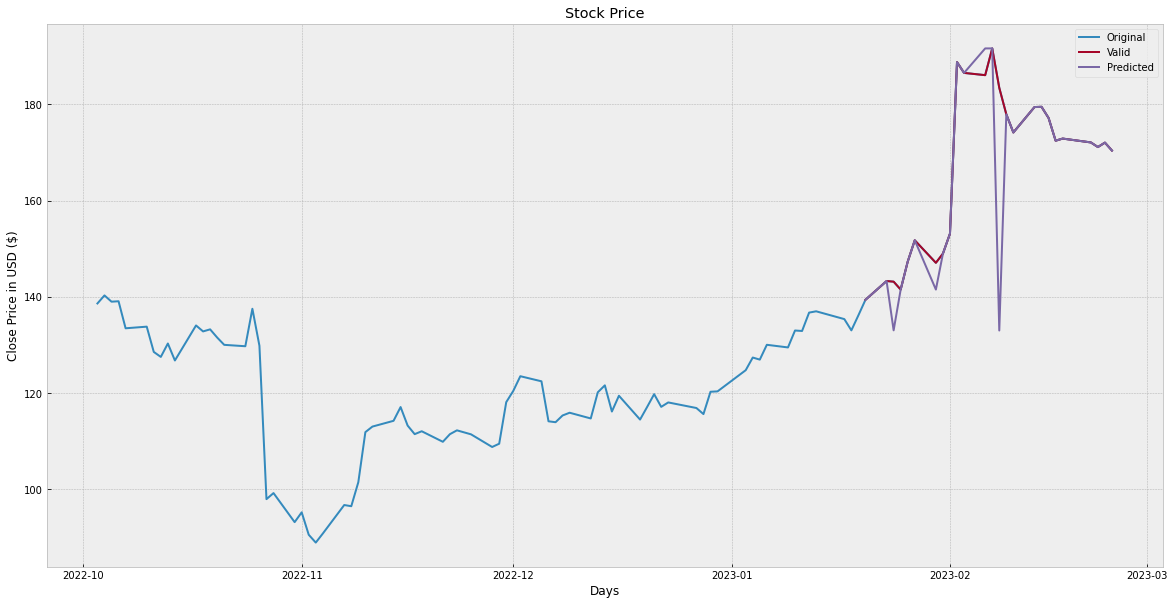

In [64]:
#Decision Tree regression
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Stock Price')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close']])
plt.plot(valid[['Predictions']])
plt.legend(['Original' , 'Valid', 'Predicted'])
plt.show()